# house price prediction project from kaggle

- [based on kaggle competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)


* steps to take:
    * read the data
    * visualize and make sense of data
    * clean the data
    * build models
    * pick one and tune it
    * export model (optional)

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import data
housing_data_train = pd.read_csv("train.csv")
housing_data_test = pd.read_csv("test.csv")

In [4]:
housing_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing_data_train.isna().sum().head(10)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [7]:
housing_data_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## <span style="color:blue">*use this after cleaning the data*</span>.

In [8]:
## use this after cleaning the data
# ## visualize corralation matrix
# corr_matrix = housing_data_train.corr()
# fig, ax = plt.subplots(figsize=(10,10))
# ax = sns.heatmap(housing_data_train.dtypes!="object",
#                  cmap="YlBu",
#                  annot=True,
#                  linewidths=1,
#                  ftm=".2f")

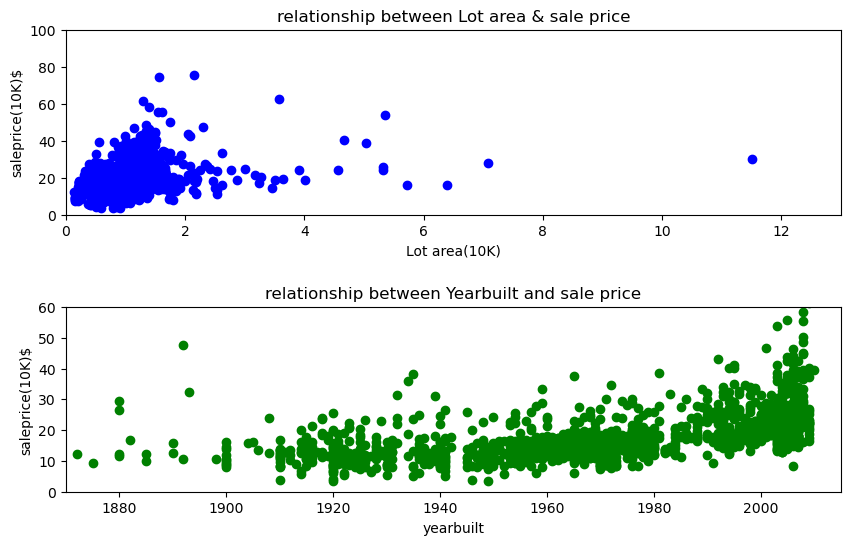

In [27]:
## plot the relationship between LotArea & YearBuilt and saleprice
fig , (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,6))
plt.subplots_adjust(hspace=0.5)

scatter = ax1.scatter(x= housing_data_train["LotArea"]/10000,
                      y= housing_data_train["SalePrice"]/10000,
                      c="blue")
ax1.set_ylim((0,100))
ax1.set_xlim((0,13))
ax1.set(title="relationship between Lot area & sale price",
        ylabel="saleprice(10K)$",
        xlabel="Lot area(10K)")

scatter = ax2.scatter(x = housing_data_train["YearBuilt"],
                      y= housing_data_train["SalePrice"]/10000,
                      c= "g")
ax2.set_ylim((0,60))
ax2.set_xlim((1870,2015))
ax2.set(title = "relationship between Yearbuilt and sale price",
        ylabel="saleprice(10K)$",
        xlabel="yearbuilt");



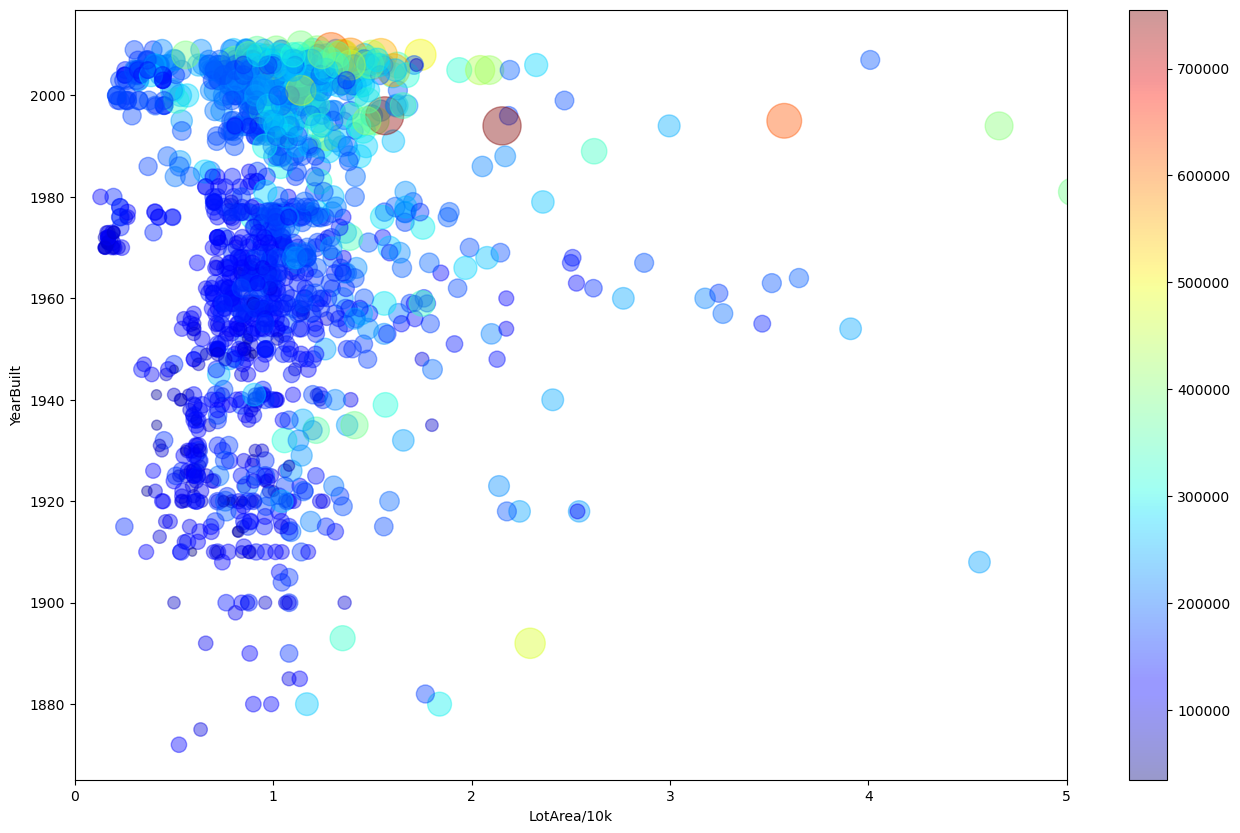

In [55]:
housing_data_train_copy=housing_data_train.copy()
housing_data_train_copy["LotArea/10k"]=housing_data_train_copy["LotArea"]/10000
housing_data_train_copy["SalePrice/1k"]=housing_data_train_copy["SalePrice"]/1000

housing_data_train_copy.plot(kind="scatter",x="LotArea/10k", y="YearBuilt", alpha=0.4,xlim=(0,5),
                        s=housing_data_train_copy["SalePrice/1k"],figsize=(16,10),
                        c=housing_data_train_copy["SalePrice"], cmap=plt.get_cmap("jet"),colorbar=True);

## Cleaning the data

In [57]:
imputer = SimpleImputer(strategy="median")

In [75]:
housing_num=housing_data_train.select_dtypes(include=["number"]).drop("SalePrice",axis=1)

In [76]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

## Create full pipeline to process numerical & categorical data

In [77]:
num_pipeline= Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("standard scaler",StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
pd.DataFrame(housing_num_tr).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64

In [73]:
cat_attributes=housing_data_train.select_dtypes(include=["object"]).columns
len(cat_attributes)

43

In [87]:
num_attributes = list(housing_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes)
])

housing_prepared = full_pipeline.fit_transform(housing_data_train)
housing_prepared

<1460x305 sparse matrix of type '<class 'numpy.float64'>'
	with 116800 stored elements in Compressed Sparse Row format>